In [5]:
!pip install catboost

In [6]:
#importing necessary library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
# Filter out a specific warning category
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling

#Train test split
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Model Training
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

#Hypeparameter Tuning
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [7]:
data=pd.read_csv(r"Feature_Engineered_Dataset (1).csv")

In [8]:
data.head()

,Year,Real_GDP_Ksh,Population_Growth,Female_Labor_Participation,Male_Labor_Participation,Education_Expenditure_Ksh,Inflation,Dollar_Rate,Total_Unemployment,Labor_Total_Population_Ratio,Urban_Population_Growth_Income_Per_Capita_Growth_Ratio
0,2000,982855,2.92,50.46,46.89,4.914291e+10,9.98,76.175542,3.13,0.920229,1.030328
1,2001,1020111,3.03,50.03,46.87,5.154121e+10,5.73,78.563195,3.07,0.924819,1.050862
2,2002,1025583,3.03,49.61,46.84,5.949633e+10,1.97,78.749142,3.09,0.923703,1.055151
3,2003,1055658,2.97,49.18,46.82,7.552908e+10,9.81,84.148300,3.04,0.921479,1.039266
4,2004,1109338,2.99,48.76,46.79,8.157499e+10,11.80,80.650112,3.00,0.918978,1.043338


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Year                                                    23 non-null     int64  
 1   Real_GDP_Ksh                                            23 non-null     int64  
 2   Population_Growth                                       23 non-null     float64
 3   Female_Labor_Participation                              23 non-null     float64
 4   Male_Labor_Participation                                23 non-null     float64
 5   Education_Expenditure_Ksh                               23 non-null     float64
 6   Inflation                                               23 non-null     float64
 7   Dollar_Rate                                             23 non-null     float64
 8   Total_Unemployment                        

In [10]:
X = data.iloc[:, :-1]  # Slice to include all columns except the last one (assuming the last column is "Total_Unemployment").
y = data.iloc[:, -1]   # Slice to include only the last column (assuming the last column is "Total_Unemployment").


In [11]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [12]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.09919882 0.12445665 0.26949124 0.12158113 0.04837611 0.17072949
 0.02140656 0.06638893 0.04674367 0.0316274 ]


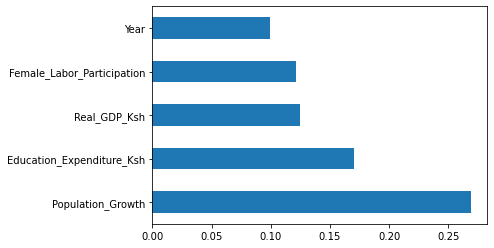

In [13]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [14]:
from sklearn.ensemble import ExtraTreesRegressor

# Create and train an ExtraTreesRegressor model
etr_model = ExtraTreesRegressor()
etr_model.fit(X, y)

# Get feature importances from the model
feature_importances = etr_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_features = feature_importance_df['Feature'].head(5)

# Create the feature variable X with the selected top features
X = data[top_features]

# Create the target variable y
y = data['Total_Unemployment']


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 'test_size' specifies the proportion of the dataset to include in the testing set (e.g., 0.2 for 20%).
# 'random_state' ensures reproducibility of the split; you can choose any integer.

# Print the shapes of the training and testing sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (18, 5)
X_test shape: (5, 5)
y_train shape: (18,)
y_test shape: (5,)


In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# Define a function to evaluate model performance
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

# Create a dictionary of regression models
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "LGBMRegressor": LGBMRegressor(),
}

# Split your data into X_train, X_test, y_train, y_test

# Initialize variables to track the best model and its performance
best_model_name = None
best_test_r2 = -float('inf')
best_test_mae = float('inf')
best_test_rmse = float('inf')

# Loop through the models and evaluate their performance
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    print('Model performance for Training set:')
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2))
    print('----------------------------------')
    print('Model performance for Test set:')
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2))
    print('=' * 35)
    print('\n')

    # Check if the current model has a higher test R2 score than the best model so far
    if test_r2 > best_test_r2:
        best_test_r2 = test_r2
        best_test_mae = test_mae
        best_test_rmse = test_rmse
        best_model_name = model_name

# Check for overfitting by comparing training and test R2 scores
train_test_r2_difference = train_r2 - best_test_r2
overfitting_detected = train_test_r2_difference > 0.1  # Adjust the threshold as needed

if overfitting_detected:
    print("The best model is:", best_model_name)
    print("Test Set R2 Score for the best model is:", best_test_r2)
    print("Overfitting detected.")
else:
    print("No overfitting detected. The best model is:", best_model_name)
    print("Test Set R2 Score for the best model is:", best_test_r2)

# Include the best model in your list of models
models["Best Model"] = models[best_model_name]

# Now, you can access the best model using models["Best Model"]


Linear Regression
Model performance for Training set:
- Root Mean Squared Error: 0.0255
- Mean Absolute Error: 0.0212
- R2 Score: 0.9784
----------------------------------
Model performance for Test set:
- Root Mean Squared Error: 3.7805
- Mean Absolute Error: 2.3774
- R2 Score: -50.0971


K-Neighbors Regressor
Model performance for Training set:
- Root Mean Squared Error: 0.1469
- Mean Absolute Error: 0.0644
- R2 Score: 0.2788
----------------------------------
Model performance for Test set:
- Root Mean Squared Error: 2.3781
- Mean Absolute Error: 2.3112
- R2 Score: -19.2190


Decision Tree
Model performance for Training set:
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set:
- Root Mean Squared Error: 2.1222
- Mean Absolute Error: 1.9720
- R2 Score: -15.1017


Random Forest Regressor
Model performance for Training set:
- Root Mean Squared Error: 0.0749
- Mean Absolute Error: 0.0299
- R

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Create a Random Forest Regressor
rf = RandomForestRegressor()

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_pred = best_rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)



Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Root Mean Squared Error (RMSE): 2.0570926540972403
Mean Absolute Error (MAE): 1.9809801846617436
R2 Score: -14.128958425838844


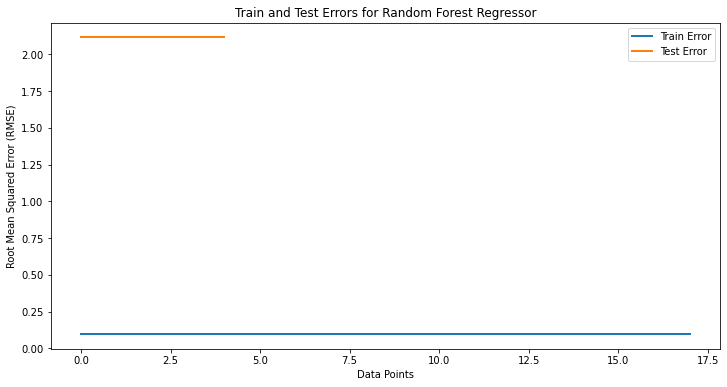

['best_random_forest_model.pkl']

In [18]:
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fit the Random Forest Regressor with the best hyperparameters
best_rf_model = RandomForestRegressor(bootstrap=True, max_depth=10, max_features='sqrt',
                                     min_samples_leaf=1, min_samples_split=10, n_estimators=100, n_jobs=-1)
best_rf_model.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Calculate RMSE for both training and testing data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Create lists of errors for plotting
train_errors = [train_rmse] * len(X_train)
test_errors = [test_rmse] * len(X_test)

# Plot the errors
plt.figure(figsize=(12, 6))
plt.plot(train_errors, label='Train Error', linewidth=2)
plt.plot(test_errors, label='Test Error', linewidth=2)
plt.title("Train and Test Errors for Random Forest Regressor")
plt.xlabel("Data Points")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.legend()
plt.show()

# Save the best model to a .pkl file
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')


In [19]:
# Print the predictions
print("Predictions on the training data:")
print(y_train_pred)

print("Predictions on the testing data:")
print(y_test_pred)

Predictions on the training data:
[3.00486582 3.0090853  3.0090853  3.00486582 3.00482515 2.99008626
 2.96310841 2.95922647 2.96113484 2.91895715 2.87608281 2.85442782
 2.85235282 2.85235282 2.85235282 2.86541532 2.93078217 3.2077801 ]
Predictions on the testing data:
[3.2077801  3.2077801  3.2077801  3.10028928 3.10028928]


In [20]:
import joblib

# Save the best model to a file using joblib
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')

# Define the directory path to move the model file
destination_path = r'C:\Users\wanji\Desktop\integration and development\best_random_forest_model.pkl'

# Move the saved model to the specified directory
import shutil
shutil.move('best_random_forest_model.pkl', destination_path)


'C:\\Users\\wanji\\Desktop\\integration and development\\best_random_forest_model.pkl'